In [5]:
import scanpy as sc
import squidpy as sq
import pickle

import sklearn.metrics

import scib_metrics

import numpy as np

In [6]:
adata_st = sq.datasets.visium_fluo_adata_crop()
img = sq.datasets.visium_fluo_image_crop()

In [7]:
import torch
emb_data = torch.load("../GPFM/visium_fluo_image_allspot_gpfm.pkl")
emb_data = np.array(emb_data)
adata_st.obsm['X_emb'] = emb_data

In [10]:
adata_st.obsm['X_emb']

array([[ 0.52956337,  0.09173872, -0.6626865 , ...,  1.0513552 ,
        -0.45570767,  0.34293535],
       [ 0.37562096, -0.39113376, -0.55705476, ...,  0.48390436,
        -0.20893426,  0.7811492 ],
       [ 0.4561834 ,  0.07339995, -0.4024332 , ...,  0.893692  ,
        -0.19013868,  0.4985565 ],
       ...,
       [ 0.45221552,  0.23423274, -0.56891006, ...,  0.69738543,
        -0.23313159,  0.76136297],
       [ 0.41838396, -0.07956321, -0.6414033 , ...,  1.3147607 ,
        -0.4348931 ,  0.49899605],
       [ 0.38410118,  0.0811355 , -0.5860252 , ...,  1.0773783 ,
        -0.40696943,  0.37009588]], dtype=float32)

In [8]:
# evaluation
def compute_cluter(adata, emb_name = 'X_pca'):
    sc.pp.neighbors(adata, use_rep=emb_name)
    nmi = []
    ari = []
    asw = []
    for i in np.linspace(0,2,21)[1:]:
        sc.tl.leiden(adata, resolution = i)
        nmi.append(sklearn.metrics.normalized_mutual_info_score(adata.obs.leiden, adata.obs.cluster))
        ari.append(sklearn.metrics.adjusted_rand_score(adata.obs.leiden, adata.obs.cluster))
    asw.append(scib_metrics.silhouette_label(adata.obsm[emb_name], adata.obs.cluster))
    
    print(max(nmi))
    print(max(ari))
    print(max(asw))
    return max(nmi), max(ari), max(asw)

In [13]:
np.mean(compute_cluter(adata_st))

In [11]:
sc.pp.neighbors(adata_st, use_rep='X_emb')
sc.tl.umap(adata_st, random_state=0)

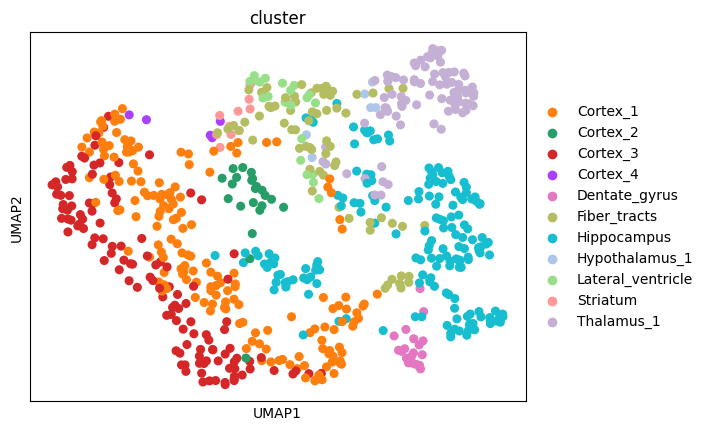

In [12]:
sc.pl.umap(adata_st, color='cluster')